In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from matplotlib import cm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
#import graphviz i dont have this whl library 
import os
os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/bin'
from google.colab import output
from google.colab import files
import pickle
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
import seaborn as sn
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier, plot_tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

uploaded = files.upload()

Saving bank_marketing_dataset.csv to bank_marketing_dataset.csv


# Functions

In [3]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def notify_me():
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

def UploadFromColab():
  uploaded = files.upload()
  

def DownloadFromColab(data_with_extention):
  files.download(data_with_extention)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Loading CSV file


In [4]:
df=pd.read_csv("bank_marketing_dataset.csv")

notify_me()

In [74]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,0,1787,0,0,0,19,oct,79.0,1,-1.0,0,unknown,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,services,married,secondary,0,4789,1,1,0,11,may,220.0,1,339.0,4,failure,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,management,single,tertiary,0,1350,1,0,0,16,apr,185.0,1,330.0,1,failure,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,management,married,tertiary,0,1476,1,1,2,3,jun,199.0,4,-1.0,0,unknown,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,0,0,1,0,2,5,may,226.0,1,-1.0,0,unknown,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


# PreProcessing

## Describe the data 

In [5]:
#checking the missing values 
print(df.isnull().sum())
print("\nNo missing values ")

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No missing values 


## Encoding

## Label Encoding 

In [7]:
print(df)
print(df[['default','housing','loan','y']])
#here we can apply the Label Encoder because we have only two distinct values 

label_enconder=LabelEncoder()
label_enconder.fit(df[['default']])
df[['default']]=label_enconder.transform(df[['default']]) 

label_enconder=LabelEncoder()
label_enconder.fit(df[['housing']])
df[['housing']]=label_enconder.transform(df[['housing']]) 

label_enconder=LabelEncoder()
label_enconder.fit(df[['loan']])
df[['loan']]=label_enconder.transform(df[['loan']]) 

label_enconder=LabelEncoder()
label_enconder.fit(df[['contact']])
df[['contact']]=label_enconder.transform(df[['contact']]) 

label_enconder=LabelEncoder()
label_enconder.fit(df[['y']])
df[['y']]=label_enconder.transform(df[['y']]) 


print(df[['default','housing','loan','y']])


      age            job  marital  education  ...  pdays  previous  poutcome  y
0      30     unemployed  married    primary  ...   -1.0         0   unknown  0
1      33       services  married  secondary  ...  339.0         4   failure  0
2      35     management   single   tertiary  ...  330.0         1   failure  0
3      30     management  married   tertiary  ...   -1.0         0   unknown  0
4      59    blue-collar  married  secondary  ...   -1.0         0   unknown  0
...   ...            ...      ...        ...  ...    ...       ...       ... ..
4516   33       services  married  secondary  ...   -1.0         0   unknown  0
4517   57  self-employed  married   tertiary  ...   -1.0         0   unknown  0
4518   57     technician  married  secondary  ...   -1.0         0   unknown  0
4519   28    blue-collar  married  secondary  ...  211.0         3     other  0
4520   44   entrepreneur   single   tertiary  ...  249.0         7     other  0

[4521 rows x 17 columns]
      default 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## One Hot Encoding

In [8]:
#print(df)
one_hot_cols=['education','marital','job','month','poutcome']
one_hot_encoder=OneHotEncoder(sparse=False)

df=encode_and_bind(df,'education')
df=encode_and_bind(df,'marital')
df=encode_and_bind(df,'job')
df=encode_and_bind(df,'month')
df=encode_and_bind(df,'poutcome')
print("New Dataframe after applying onehotEncoding\n")
print(df)

New Dataframe after applying onehotEncoding

      age            job  ... poutcome_success poutcome_unknown
0      30     unemployed  ...                0                1
1      33       services  ...                0                0
2      35     management  ...                0                0
3      30     management  ...                0                1
4      59    blue-collar  ...                0                1
...   ...            ...  ...              ...              ...
4516   33       services  ...                0                1
4517   57  self-employed  ...                0                1
4518   57     technician  ...                0                1
4519   28    blue-collar  ...                0                0
4520   44   entrepreneur  ...                0                0

[4521 rows x 52 columns]


# Define X and Y

In [9]:
#i did this because i can not normalize string values and i already did one hot encoding to those columns
df_pre=df
df_pre=df.drop(['job','marital','education','month','poutcome'], axis=1)
df_pre.head()

#create subsets of this data to speed up 

y = df_pre['y']
X = df_pre.loc[: , df_pre.columns != 'y']
#here we use subset because there is no much time to train the full dataset
subX=X[0:100]
suby=y[0:100]
subX.head()

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,0,19,79.0,1,-1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,0,4789,1,1,0,11,220.0,1,339.0,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,0,16,185.0,1,330.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,2,3,199.0,4,-1.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,2,5,226.0,1,-1.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Split the data into training and testing 

In [10]:
#working on subset of the data
X_train, X_test, y_train, y_test = train_test_split(subX, suby, test_size = 0.2)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("X Train Description \n")
print(X_train.describe())
print("\n\nX test Description \n")
print(X_test.describe())

X Train Description 

           age   default  ...  poutcome_success  poutcome_unknown
count  80.0000  80.00000  ...         80.000000         80.000000
mean   41.0750   0.02500  ...          0.037500          0.762500
std    10.4576   0.15711  ...          0.191182          0.428236
min    20.0000   0.00000  ...          0.000000          0.000000
25%    32.0000   0.00000  ...          0.000000          1.000000
50%    40.0000   0.00000  ...          0.000000          1.000000
75%    48.5000   0.00000  ...          0.000000          1.000000
max    67.0000   1.00000  ...          1.000000          1.000000

[8 rows x 46 columns]


X test Description 

             age  default  ...  poutcome_success  poutcome_unknown
count  20.000000     20.0  ...              20.0         20.000000
mean   42.100000      0.0  ...               0.0          0.900000
std    13.867417      0.0  ...               0.0          0.307794
min    23.000000      0.0  ...               0.0          0.000000
25%

## Normailization

In [11]:
#Method one not worked                                                                                                                                                                                        
scaler =MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# SVM

In [12]:


'''this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
print(str(clf))
print(clf.score(X_train,y_train))
'''
# here we select best c in c values list and its classifir then we plot it and 
# we show it is accurecy ..etc 
c_values=[0.001,0.002,0.003]

best_c_score_train=0
best_c_score_test=0
best_c_train=0
best_c_test=0
svm_best_classifire= SVC(kernel = 'linear', C=0.1)

my_classifires={}
# c= 1
clf2 = SVC(kernel = 'linear', C=c_values[0]).fit(X_train, y_train)
print('Current C '+str(c_values[0]))
current_c_score_train=clf2.score(X_train, y_train)
current_c_score_test=clf2.score(X_test, y_test)

print('\t Current C Clf score '+str(current_c_score_train))
print('\t Current C train score '+str(current_c_score_train))
print('\t Current C test score '+str(current_c_score_test))

my_classifires.update({c_values[0]:[clf2,clf2.score(X_train,y_train),current_c_score_train,current_c_score_test]})

#c=2
clf2 = SVC(kernel = 'linear', C=c_values[1]).fit(X_train, y_train)
print('Current C '+str(c_values[1]))
current_c_score_train=clf2.score(X_train, y_train)
current_c_score_test=clf2.score(X_test, y_test)

print('\t Current C Clf score '+str(current_c_score_train))
print('\t Current C train score '+str(current_c_score_train))
print('\t Current C test score '+str(current_c_score_test))

my_classifires.update({c_values[1]:[clf2,clf2.score(X_train,y_train),current_c_score_train,current_c_score_test]})


#c=3
clf2 = SVC(kernel = 'linear', C=c_values[2]).fit(X_train, y_train)
print('Current C '+str(c_values[2]))
current_c_score_train=clf2.score(X_train, y_train)
current_c_score_test=clf2.score(X_test, y_test)
print('\t Current C Clf score '+str(current_c_score_train))
print('\t Current C train score '+str(current_c_score_train))
print('\t Current C test score '+str(current_c_score_test))

my_classifires.update({c_values[2]:[clf2,clf2.score(X_train,y_train),current_c_score_train,current_c_score_test]})

#saving the Classifires to pickle 

#creating a pickle file 
pickle.dump( my_classifires, open( "svm_classifires.p", "wb" ) )


Current C 0.001
	 Current C Clf score 0.875
	 Current C train score 0.875
	 Current C test score 0.7
Current C 0.002
	 Current C Clf score 0.875
	 Current C train score 0.875
	 Current C test score 0.7
Current C 0.003
	 Current C Clf score 0.875
	 Current C train score 0.875
	 Current C test score 0.7


In [13]:
# Downloading SVM Classifires as pickle 
DownloadFromColab('svm_classifires.p')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
#upload SVM CLF Pickle

UploadFromColab()
my_svm_classifires = pickle.load( open( "svm_classifires.p", "rb" ) )


Saving svm_classifires (5).p to svm_classifires (5).p


In [15]:
my_svm_classifires

clf=my_svm_classifires.get(c_values[0])[0]

clf


SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Cross Validation

In [16]:
#Cross validation for best svm is :

#c1
print('C='+str(c_values[0]))
print('Cross-validation (accuracy)', cross_val_score(my_svm_classifires.get(c_values[0])[0], subX, suby, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(my_svm_classifires.get(c_values[0])[0], subX, suby, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(my_svm_classifires.get(c_values[0])[0], subX, suby, cv=5, scoring = 'recall'))

#c 2
print('C='+str(c_values[1]))
print('Cross-validation (accuracy)', cross_val_score(my_svm_classifires.get(c_values[1])[0], subX, suby, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(my_svm_classifires.get(c_values[1])[0], subX, suby, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(my_svm_classifires.get(c_values[1])[0], subX, suby, cv=5, scoring = 'recall'))

#c3
print('C='+str(c_values[2]))
print('Cross-validation (accuracy)', cross_val_score(my_svm_classifires.get(c_values[2])[0], subX, suby, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(my_svm_classifires.get(c_values[2])[0], subX, suby, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(my_svm_classifires.get(c_values[2])[0], subX, suby, cv=5, scoring = 'recall'))


C=0.001
Cross-validation (accuracy) [0.85 0.8  0.85 0.85 0.8 ]
Cross-validation (AUC) [0.25490196 0.52941176 0.74509804 0.78431373 0.78125   ]
Cross-validation (recall) [0.         0.         0.33333333 0.         0.        ]
C=0.002
Cross-validation (accuracy) [0.85 0.8  0.85 0.85 0.8 ]
Cross-validation (AUC) [0.2745098  0.50980392 0.76470588 0.78431373 0.78125   ]
Cross-validation (recall) [0.         0.         0.33333333 0.         0.        ]
C=0.003
Cross-validation (accuracy) [0.85 0.8  0.85 0.85 0.8 ]
Cross-validation (AUC) [0.2745098  0.50980392 0.76470588 0.78431373 0.78125   ]
Cross-validation (recall) [0.         0.         0.33333333 0.         0.        ]


##  Confusion Matrix

##C_values[1] is the best clf

In [ ]:

svm_predicted_mc=my_svm_classifires.get(c_values[0])[0].predict(X_test)
confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
print(confusion)


[[16  0]
 [ 4  0]]


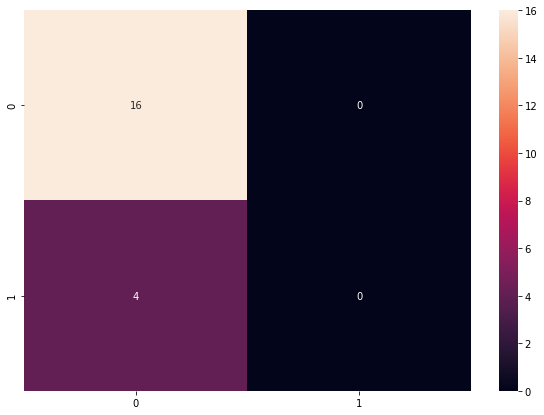

In [ ]:

df_cm = pd.DataFrame(confusion)
plt.figure(figsize = (10,7))
sn.heatmap(confusion, annot=True)

# LogisticRegression

In [ ]:

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Confusion Matrix of LogisticRegression

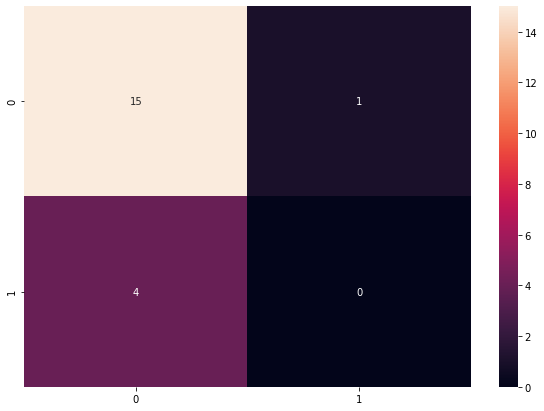

In [ ]:
df_cm = pd.DataFrame(confusion)
plt.figure(figsize = (10,7))
sn.heatmap(confusion, annot=True)

### Accuracy ,Precision,Recall,F1 of LogisticRegression

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predicted)))

Accuracy: 0.75
Precision: 0.00
Recall: 0.00
F1: 0.00


## Precision-Recall Curve of LogisticRegression

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


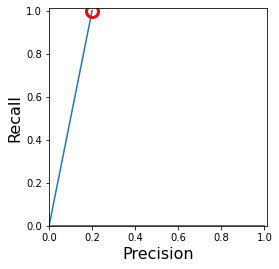

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test,lr_predicted )
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

## ROC curve of  LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


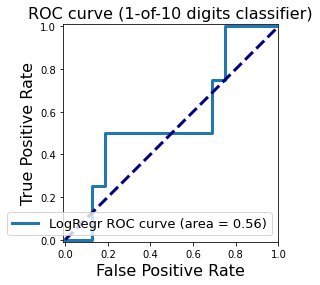

In [ ]:
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

## ROC curve: (1-of-10 digits classifier) of SVM given list of gamma values 

gamma = 0.01  accuracy = 0.80   AUC = 0.58
gamma = 0.10  accuracy = 0.80   AUC = 0.50
gamma = 0.20  accuracy = 0.80   AUC = 0.50
gamma = 1.00  accuracy = 0.80   AUC = 0.50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


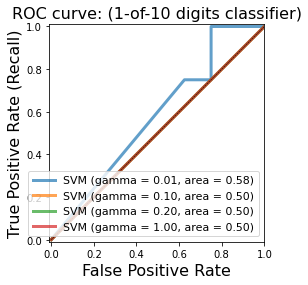

In [ ]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

### Grid search example of SVM with RBF Kernel

In [ ]:
clf = SVC(kernel='rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.85
Test set AUC:  0.578125
Grid best parameter (max. AUC):  {'gamma': 0.01}
Grid best score (AUC):  0.6527472527472526


# Decision Tree


In [ ]:
depthes=[1,2,4,8,16]

dt_classifire={}
for depth in depthes:
    clf2 = DecisionTreeClassifier(max_depth =depth).fit(X_train, y_train)
    print('Current Depth '+str(depth))
    current_score_train=clf2.score(X_train, y_train)
    current_score_test=clf2.score(X_test, y_test)
    print('\t Current Depth train score '+str(current_score_train))
    print('\t Current Depth testscore '+str(current_score_test))
    dt_classifire.update({depth:[clf2,clf2.score(X_train,y_train),current_c_score_train,current_c_score_test]})





Current Depth 1
	 Current Depth train score 0.875
	 Current Depth testscore 0.9
Current Depth 2
	 Current Depth train score 0.9125
	 Current Depth testscore 0.9
Current Depth 4
	 Current Depth train score 0.9375
	 Current Depth testscore 0.9
Current Depth 8
	 Current Depth train score 1.0
	 Current Depth testscore 0.9
Current Depth 16
	 Current Depth train score 1.0
	 Current Depth testscore 0.9


#saving the DT  Classifires to pickle 

In [ ]:


#creating a pickle file 
pickle.dump( dt_classifire, open( "dt_classifires.p", "wb" ) )
# Downloading DT Classifires as pickle 
DownloadFromColab('dt_classifires.p')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Upload DT CLF Pickle

In [ ]:

UploadFromColab()
dt_classifire = pickle.load( open( "dt_classifires.p", "rb" ) )


Saving dt_classifires.p to dt_classifires (1).p


In [ ]:
dt_classifire

{1: [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=1, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  0.875,
  0.975,
  0.75],
 2: [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=2, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  0.9125,
  0.975,
  0.75],
 4: [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, cri

## Drawing the Best DT

Best depth for test is [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 1.0, 0.975, 0.75] and it is value = 0.75
Best depth for Train is [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 1.0, 0.975, 0.75] and it is value = 0.975


[Text(547.2692307692308, 770.1, 'X[7] <= 641.0\ngini = 0.255\nsamples = 80\nvalue = [68, 12]'),
 Text(386.3076923076923, 679.5, 'X[44] <= 0.5\ngini = 0.193\nsamples = 74\nvalue = [66, 8]'),
 Text(257.53846153846155, 588.9, 'X[9] <= 399.5\ngini = 0.155\nsamples = 71\nvalue = [65, 6]'),
 Text(193.15384615384616, 498.3, 'X[0] <= 21.5\ngini = 0.133\nsamples = 70\nvalue = [65, 5]'),
 Text(128.76923076923077, 407.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(257.53846153846155, 407.7, 'X[36] <= 0.5\ngini = 0.109\nsamples = 69\nvalue = [65, 4]'),
 Text(128.76923076923077, 317.1, 'X[7] <= 347.5\ngini = 0.061\nsamples = 64\nvalue = [62, 2]'),
 Text(64.38461538461539, 226.5, 'gini = 0.0\nsamples = 53\nvalue = [53, 0]'),
 Text(193.15384615384616, 226.5, 'X[25] <= 0.5\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(128.76923076923077, 135.89999999999998, 'X[7] <= 359.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(64.38461538461539, 45.30000000000007, 'gini = 0.0\nsamples = 1\nva

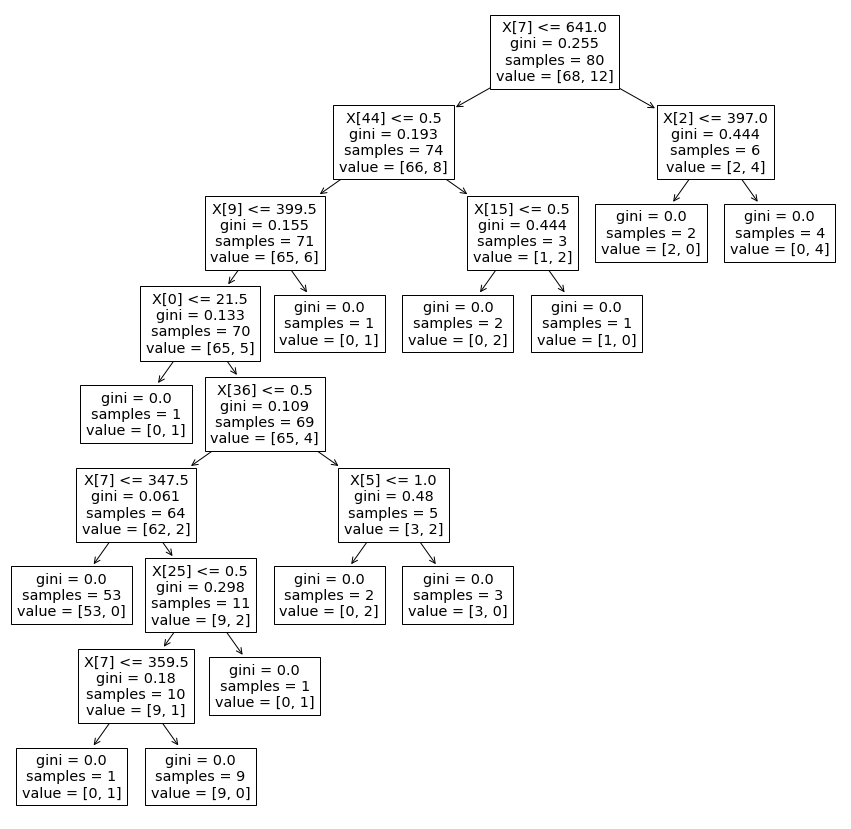

In [ ]:
#when depth=8 we got best values 

clf=dt_classifire.get(depthes[3])[0]
print("Best depth for test is "+str(dt_classifire.get(depthes[3]))+' and it is value = '+str(dt_classifire.get(depthes[3])[3]))

print("Best depth for Train is "+str(dt_classifire.get(depthes[3]))+' and it is value = '+str(dt_classifire.get(depthes[3])[2]))

# i dont have the  graphviz library i need to pip install it to show the DT
plt.figure(figsize=(15,15))
tree.plot_tree(clf)


# Clustering

# AgglomerativeClustering

In [ ]:
X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3, linkage='ward')
cls_assignment = cls.fit_predict(X)

# Drawing the AgglomerativeClustering

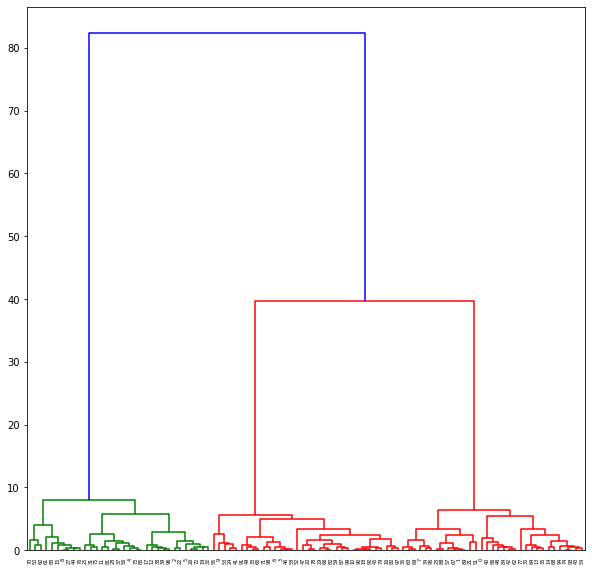

In [ ]:
plt.figure(figsize=(10,10))
dendrogram(ward(X))
plt.show()

## DBSCAN

In [ ]:
X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 20, min_samples = 2)

cls = dbscan.fit_predict(X)
cls

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
print("Cluster membership values:\n{}".format(cls))

Cluster membership values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# K-mean

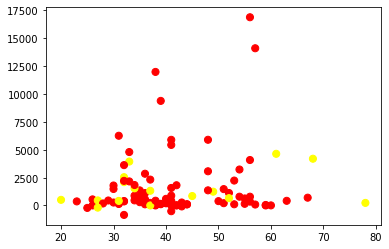

In [70]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(subX)
y_kmeans = kmeans.predict(X_test)
y_kmeans
plt.scatter(subX.iloc[:, 0], subX.iloc[:, 2], c=suby, s=50, cmap='autumn')

In [17]:
# SVM

In [23]:
#fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 0.001
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
#plt.scatter(X_train[:,5],X_train[:,11],c=y_train, s=50, cmap='autumn')
#

Linear SVC


In [25]:

print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RBF-kernel SVC on training set: 0.88
Accuracy of RBF-kernel SVC on test set: 0.70


In [38]:
from sklearn.svm import LinearSVC
this_C=0.01

clf = LinearSVC(C=this_C).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(subX, suby)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))
this_C=0.02

clf = LinearSVC(C=this_C).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(subX, suby)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))
this_C=0.03

clf = LinearSVC(C=this_C).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(subX, suby)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of RBF-kernel SVC on training set: 0.71
Accuracy of RBF-kernel SVC on test set: 0.60
Accuracy of RBF-kernel SVC on training set: 0.84
Accuracy of RBF-kernel SVC on test set: 0.70
Accuracy of RBF-kernel SVC on training set: 0.82
Accuracy of RBF-kernel SVC on test set: 0.70


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [56]:
this_gamma=0.01

clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(subX, suby)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))
this_gamma=1

clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(subX, suby)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))

this_gamma=10

clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))



Accuracy of RBF-kernel SVC on training set: 0.94
Accuracy of RBF-kernel SVC on test set: 0.70
Accuracy of RBF-kernel SVC on training set: 0.94
Accuracy of RBF-kernel SVC on test set: 0.70
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.70


In [53]:
from sklearn.svm import SVC
this_gamma=0.01
this_C=0.01
clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))
this_gamma=1
this_C=0.1
clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))


this_gamma=10
this_C=10
clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))




Accuracy of RBF-kernel SVC on training set: 0.88
Accuracy of RBF-kernel SVC on test set: 0.70
Accuracy of RBF-kernel SVC on training set: 0.88
Accuracy of RBF-kernel SVC on test set: 0.70
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.70


In [ ]:
############################Classification#####################

In [58]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear').fit(X_train,y_train)
clf
y_predict = clf.predict(X_test)
y_predict
print('Accuracy of Logistic regression classifier on train set:' , clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test, y_test))



Accuracy of Logistic regression classifier on train set: 0.925
Accuracy of Logistic regression classifier on test set: 0.7


In [60]:
clf = LogisticRegression().fit(X_train_scaled, y_train)

print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_train_scaled, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test_scaled, y_test))
#plt.scatter(X_train[:,5],X_train[:,13],c=y_train, s=50, cmap='autumn')

Accuracy of Logistic regression classifier on test set: 0.875
Accuracy of Logistic regression classifier on test set: 0.7


In [61]:


clf = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test, y_test))

Accuracy of Logistic regression classifier on test set: 0.9125
Accuracy of Logistic regression classifier on test set: 0.7


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
clf = LogisticRegression().fit(X_train_scaled, y_train)

print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_train_scaled, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test_scaled, y_test))

Accuracy of Logistic regression classifier on test set: 0.875
Accuracy of Logistic regression classifier on test set: 0.7


In [63]:
##############################Regression#############################

In [64]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

clf.fit(X_train,y_train)

print('linear model coeff (w)', clf.coef_)
print('linear model intercept (b)' , clf.intercept_)
print('R-squared score (training)', clf.score(X_train, y_train))
print('R-squared score (test)', clf.score(X_test,y_test))






linear model coeff (w) [ 8.26762202e-03  1.42747881e-01 -3.30055842e-06 -1.31070901e-01
 -1.73279502e-01 -1.27654192e-01  5.84265401e-03  5.16623630e-04
  4.73023904e-02  7.02769151e-04 -9.37296089e-03  1.74420165e-01
 -7.35218810e-02 -6.53674552e-02 -3.55308287e-02 -1.00408239e-01
 -1.50857817e-03  1.01916817e-01  1.28474565e-01 -2.93999895e-01
 -4.25764350e-02 -3.55442593e-01  9.15592348e-02 -6.92613854e-02
 -3.97380775e-01 -1.54576733e-02  1.07564086e+00 -4.69106437e-02
  2.04940962e-01 -2.79586218e-01 -2.13003236e-01 -2.30331609e-01
 -1.38777878e-16 -1.18867006e-01  2.16805367e-01  7.06003113e-02
  4.74121762e-01 -1.38777878e-17  2.59493832e-01 -2.12587684e-01
 -2.46231737e-01  0.00000000e+00 -9.04674656e-02 -2.89322621e-02
  2.60533570e-01 -1.41133842e-01]
linear model intercept (b) -0.2703122833071654
R-squared score (training) 0.6449292370033469
R-squared score (test) -0.577718515530157


In [65]:


import numpy as np
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))



ridge regression linear model intercept: 0.10878790003179897
ridge regression linear model coeff:
[-2.23781685e-03 -4.35015484e-03 -3.92824958e-06 -3.72979871e-02
 -5.48797929e-02 -1.94920254e-02  1.83824789e-03  4.79079370e-04
  5.24291961e-03  7.18986920e-04 -1.11350645e-02  2.71479564e-03
 -2.47059352e-02 -1.26840926e-02  3.46752321e-02 -1.85682174e-02
  6.90110778e-03  1.16671096e-02  2.43976225e-02 -4.81439962e-02
 -4.98790824e-03 -8.75192625e-03  1.36618584e-02 -6.74829087e-03
 -1.90453732e-02  2.34339505e-02  3.76228537e-02 -1.98577101e-02
  1.54957925e-02 -7.07687275e-03  2.30233804e-03 -2.88119837e-02
  0.00000000e+00 -6.96668722e-03  1.60942976e-02  1.38463776e-02
  5.15500539e-02  0.00000000e+00 -1.04746844e-02 -2.73602809e-02
 -1.01794310e-02  0.00000000e+00 -3.04647396e-02  4.45816068e-03
  5.21206847e-02 -2.61141057e-02]
R-squared score (training): 0.334
R-squared score (test): -0.110
Number of non-zero features: 43


In [73]:



from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train, y_train)


print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))





Non-zero features: 3
R-squared score (training): 0.185
R-squared score (test): -0.082

